In [1]:
from load_data import data, xu_masses, phi_masses, mc_names

Loading data from /workspaces/stats_intro/data
Done!


In [2]:
import pandas as pd

df = pd.DataFrame(data['xu_500_phi_1'])
df.head()

,signal,ttbarmumu,ttbarmumumunu
0,0.000000,0.999944,0.999997
1,0.000000,1.000000,1.000000
2,0.000127,0.999972,0.999994
3,0.000000,0.999998,0.999942
4,0.000006,0.999965,1.000000


Welcome to JupyROOT 6.30/04


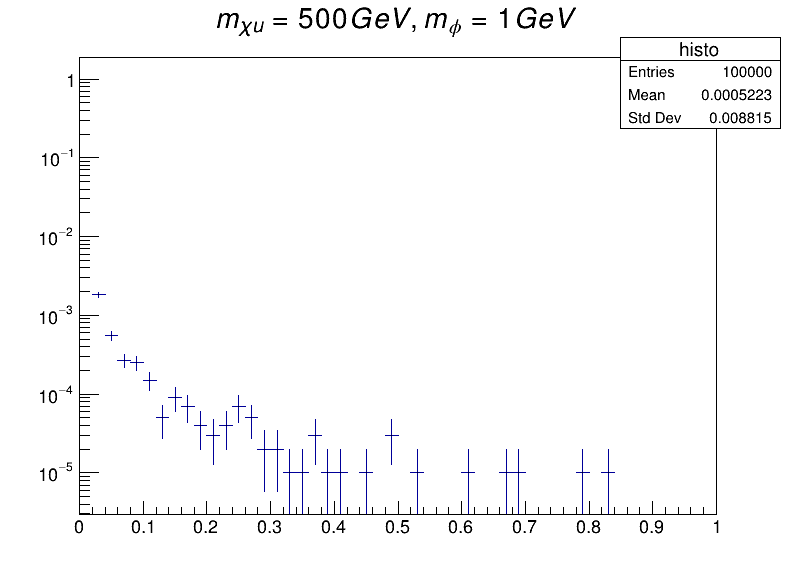

In [3]:
import ROOT
n_bins = 50
title = 'm_{\chi u}=500GeV, m_{\phi}=1GeV'
histo = ROOT.TH1F("histo", title, n_bins, 0, 1)
canvas = ROOT.TCanvas("canvas", "canvas", 800, 600)
canvas.SetLogy()
[histo.Fill(x) for x in df['signal']]
histo.Scale(1/histo.Integral())
histo.Draw()
canvas.Draw()


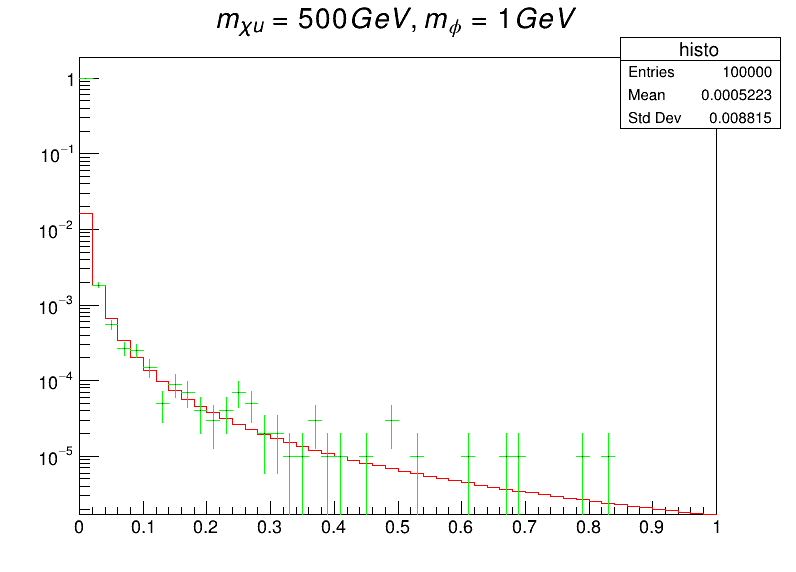

In [4]:
import scipy.stats as stats

model = stats.alpha
params = model.fit(df['signal'])

x = [ histo.GetBinCenter(bin+1) for bin in range(n_bins) ]
fit_bin=2
int_histo = ROOT.TH1F("int_histo", title, n_bins, 0, 1)
[ int_histo.SetBinContent(bin + 1, model.pdf(x[bin], *params)) for bin in range(n_bins) ]
int_histo.Scale(histo.GetBinContent(fit_bin)/int_histo.GetBinContent(fit_bin))
int_histo.SetLineColor(ROOT.kRed)
histo.SetMinimum(int_histo.GetMinimum())
histo.SetLineColor(ROOT.kGreen)
int_histo.Draw("hist same")
histo.Draw("same")
canvas.Draw()

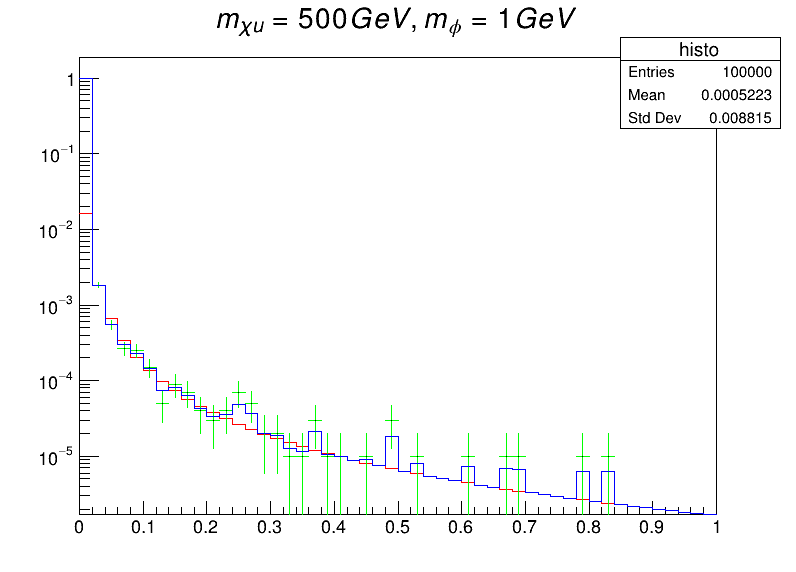

In [5]:
new_histo=ROOT.TH1F("new_histo", title, n_bins, 0, 1)

fill=True

for bin in range(n_bins):
    if bin>fit_bin:
        fill=False
    if fill:
        new_histo.SetBinContent(bin + 1, histo.GetBinContent(bin + 1))
    elif histo.GetBinContent(bin + 1) == 0:
        new_histo.SetBinContent(bin + 1, int_histo.GetBinContent(bin + 1))
    else:
        new_histo.SetBinContent(bin + 1, (histo.GetBinContent(bin + 1) + int_histo.GetBinContent(bin + 1))/2)
new_histo.SetLineColor(ROOT.kBlue)
new_histo.Scale(1/new_histo.Integral())
new_histo.Draw("hist same")
canvas.Draw()

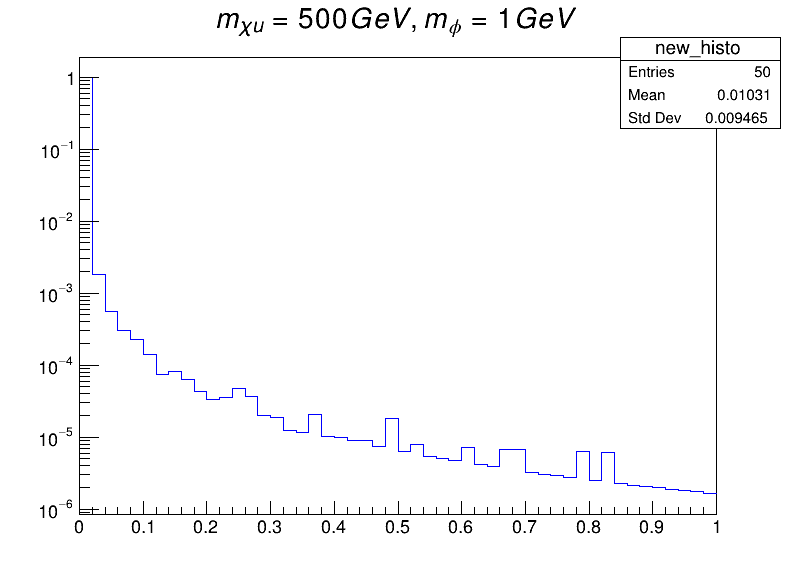

In [6]:
new_histo.Draw("hist")
canvas.Draw()